# Test plot of post-processed data
The spanwise averaged file is generated with the command:
```bash
$ python3 post_processing/pp_channel.py -m testrun/chan395_coarse_iddes.e -navg 3
```
Here the `-m` flag specifies the exodus results file to postprocess. 
The `-navg` gives the number of flow-through times to average over.  
Use the `--help` to give all options:

```
$ python3 post_processing/pp_channel.py --help
usage: pp_channel.py [-h] -m MFILE [--auto_decomp] [-v VEL_NAME] [-navg NAVG]
                     [--flowthrough FLOWTHROUGH] [--factor FACTOR]

A simple post-processing tool

optional arguments:
  -h, --help            show this help message and exit
  -m MFILE, --mfile MFILE
                        Root name of files to postprocess
  --auto_decomp         Auto-decomposition
  -v VEL_NAME, --vel_name VEL_NAME
                        Name of the velocity field
  -navg NAVG            Number of times to average
  --flowthrough FLOWTHROUGH
                        Flowthrough time (L/u)
  --factor FACTOR       Factor of flowthrough time between time steps used in
                        average
```

**Note**: I always use `epu` to combine the results file to a single file 
before postprocessing.

Running this command should generate a `profiles.dat` file which looks like
```
x,z,u,v,w
2.0,0.0,-2.0275496936429663e-05,-2.3131007753990642e-09,-1.491050971707239e-08
2.0,0.01,1.1291633275009152,1.8519581950177514e-06,-5.181326907947022e-06
2.0,0.02,2.2194016528786924,5.247413635326365e-06,-1.890207102252097e-05
2.0,0.03,3.213358988364402,9.27030881315011e-06,-3.696553317801584e-05
2.0,0.04,4.0502766509819,1.2205649122147809e-05,-5.720206614166086e-05
2.0,0.05,4.745656152428148,1.3812808164327891e-05,-7.54060750534253e-05
[..]
```
Ignore the `tw.dat` file -- that one is left over from the periodic hill.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd

In [2]:
# Load the file
ndf = pd.read_csv("profiles.dat")
grouped=ndf.groupby("x")

### Example plot of results
_Ignore the actual results, this is a test run that wasn't refined/converged/accurate_

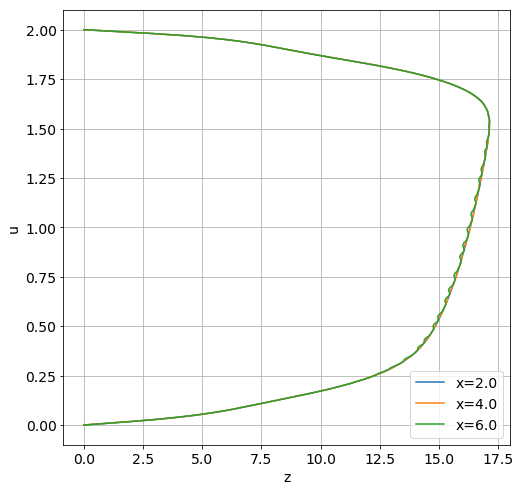

In [3]:
# Plot the results
plt.figure(figsize=(8,8))
plt.rc('font', size=14)
for k, (name, group) in enumerate(grouped):
    plt.plot(group[:].u, group[:].z, label="x="+repr(name))
plt.xlabel("z")
plt.ylabel("u")
plt.legend()
plt.grid()